In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
path = "/Users/hugojosebello/Documents/git-repos/data-tuning-scripts-v2/r_scripts_analysis/all.csv"

In [35]:
df_asoc = pd.read_csv(path, sep=";")
df_asoc["month"]= pd.to_datetime(df_asoc["month"])
df_asoc=df_asoc.set_index("month")
print(df_asoc)
df_asoc['sentiment_analysis_score_diff'] = df_asoc['sentiment_analysis_score'] - df_asoc['sentiment_analysis_score'].shift(1)
df_asoc['media_sentimiento_noticias_diff'] = df_asoc['media_sentimiento_noticias'] - df_asoc['media_sentimiento_noticias'].shift(1)
df_asoc['suicidios_diff'] = df_asoc['suicidios'] - df_asoc['suicidios'].shift(1)


            noticias_suicidio  media_sentimiento_noticias  \
month                                                       
2005-01-01                195                   -0.011282   
2005-02-01                151                   -0.009934   
2005-03-01                184                   -0.009076   
2005-04-01                131                   -0.011145   
2005-05-01                165                   -0.011333   
...                       ...                         ...   
2017-08-01                143                   -0.009301   
2017-09-01                171                   -0.016491   
2017-10-01                189                   -0.013704   
2017-11-01                186                   -0.021989   
2017-12-01                151                   -0.013046   

            sentiment_analysis_score         mes      descrip  suicidios  \
month                                                                      
2005-01-01                 -9.533333  2005-01-01  Ambo

In [52]:
granger_test = sm.tsa.stattools.grangercausalitytests(df_asoc[['sentiment_analysis_score','suicidios']], maxlag=8, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9212  , p=0.0895  , df_denom=152, df_num=1
ssr based chi2 test:   chi2=2.9788  , p=0.0844  , df=1
likelihood ratio test: chi2=2.9506  , p=0.0858  , df=1
parameter F test:         F=2.9212  , p=0.0895  , df_denom=152, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7990  , p=0.1690  , df_denom=149, df_num=2
ssr based chi2 test:   chi2=3.7187  , p=0.1558  , df=2
likelihood ratio test: chi2=3.6745  , p=0.1593  , df=2
parameter F test:         F=1.7990  , p=0.1690  , df_denom=149, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4688  , p=0.2255  , df_denom=146, df_num=3
ssr based chi2 test:   chi2=4.6176  , p=0.2020  , df=3
likelihood ratio test: chi2=4.5493  , p=0.2079  , df=3
parameter F test:         F=1.4688  , p=0.2255  , df_denom=146, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9854  , p=0.0999  

In [53]:
granger_test = sm.tsa.stattools.grangercausalitytests(df_asoc[['sentiment_analysis_score_diff','suicidios_diff']].dropna(), maxlag=8, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0673  , p=0.0819  , df_denom=151, df_num=1
ssr based chi2 test:   chi2=3.1282  , p=0.0769  , df=1
likelihood ratio test: chi2=3.0969  , p=0.0784  , df=1
parameter F test:         F=3.0673  , p=0.0819  , df_denom=151, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8677  , p=0.1581  , df_denom=148, df_num=2
ssr based chi2 test:   chi2=3.8615  , p=0.1450  , df=2
likelihood ratio test: chi2=3.8136  , p=0.1486  , df=2
parameter F test:         F=1.8677  , p=0.1581  , df_denom=148, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5234  , p=0.2109  , df_denom=145, df_num=3
ssr based chi2 test:   chi2=4.7909  , p=0.1878  , df=3
likelihood ratio test: chi2=4.7169  , p=0.1937  , df=3
parameter F test:         F=1.5234  , p=0.2109  , df_denom=145, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8012  , p=0.1319  

In [54]:
granger_test = sm.tsa.stattools.grangercausalitytests(df_asoc[['media_sentimiento_noticias_diff','suicidios_diff']].dropna(), maxlag=8, verbose=True)
print(granger_test)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4400  , p=0.1204  , df_denom=151, df_num=1
ssr based chi2 test:   chi2=2.4884  , p=0.1147  , df=1
likelihood ratio test: chi2=2.4686  , p=0.1161  , df=1
parameter F test:         F=2.4400  , p=0.1204  , df_denom=151, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2588  , p=0.1081  , df_denom=148, df_num=2
ssr based chi2 test:   chi2=4.6702  , p=0.0968  , df=2
likelihood ratio test: chi2=4.6003  , p=0.1002  , df=2
parameter F test:         F=2.2588  , p=0.1081  , df_denom=148, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1061  , p=0.1020  , df_denom=145, df_num=3
ssr based chi2 test:   chi2=6.6235  , p=0.0849  , df=3
likelihood ratio test: chi2=6.4832  , p=0.0903  , df=3
parameter F test:         F=2.1061  , p=0.1020  , df_denom=145, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4906  , p=0.0459  

In [23]:
from statsmodels.tsa.stattools import adfuller

def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)

    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")

#apply adf test on the series
adf_test(df_asoc["media_sentimiento_noticias"])
adf_test(df_asoc["suicidios"])


Test Statistic         -1.096434e+01
p-value                 8.175188e-20
# Lags                  0.000000e+00
# Observations          1.550000e+02
Critical Value (1%)    -3.473259e+00
Critical Value (5%)    -2.880374e+00
Critical Value (10%)   -2.576812e+00
dtype: float64
 Series is Stationary
Test Statistic           -1.096774
p-value                   0.716357
# Lags                   11.000000
# Observations          144.000000
Critical Value (1%)      -3.476598
Critical Value (5%)      -2.881829
Critical Value (10%)     -2.577589
dtype: float64
 Series is Non-Stationary


In [50]:
kpss_output = {}
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

df_asoc.dropna()
print("_------")
kpss_test(df_asoc["media_sentimiento_noticias_diff"].dropna())
kpss_test(df_asoc["suicidios_diff"].dropna())
print("_------")

adf_test(df_asoc["media_sentimiento_noticias_diff"].dropna())
adf_test(df_asoc["suicidios_diff"].dropna())


#https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

#

_------
Results of KPSS Test:
Test Statistic            0.049682
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test:
Test Statistic            0.097583
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
_------
Test Statistic         -7.548302e+00
p-value                 3.239105e-11
# Lags                  9.000000e+00
# Observations          1.450000e+02
Critical Value (1%)    -3.476273e+00
Critical Value (5%)    -2.881688e+00
Critical Value (10%)   -2.577513e+00
dtype: float64
 Series is Stationary
Test Statistic         -8.577303e+00
p-value                 7.899385e-14
# Lags                  1.000000e+01
# Observation

/Users/hugojosebello/.local/share/virtualenvs/data-tuning-scripts-v2-RwdOpR44/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/hugojosebello/.local/share/virtualenvs/data-tuning-scripts-v2-RwdOpR44/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/hugojosebello/.local/share/virtualenvs/data-tuning-scripts-v2-RwdOpR44/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than t

/Users/hugojosebello/.local/share/virtualenvs/data-tuning-scripts-v2-RwdOpR44/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


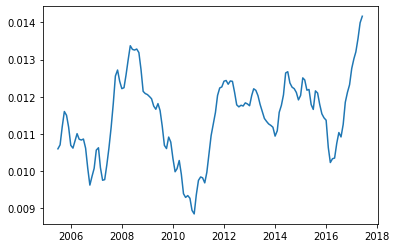

In [48]:
from fbprophet import Prophet
import pandas as pd
import altair as alt
from IPython.display import HTML
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(-df_asoc[["media_sentimiento_noticias"]], model='additive', freq=12)
plt.plot(result.trend)
plt.savefig('media_sentimiento_noticias_trend.png',dpi=500, transparent=False)

/Users/hugojosebello/.local/share/virtualenvs/data-tuning-scripts-v2-RwdOpR44/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


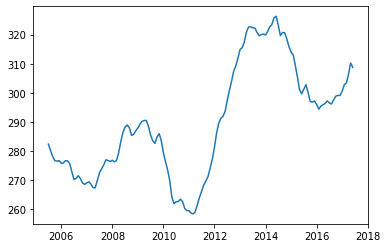

In [49]:
result = seasonal_decompose(df_asoc[["suicidios"]], model='additive', freq=12)
plt.plot(result.trend)
plt.savefig('suicidios_trend.png',dpi=500, transparent=False)

